In [1]:
# Import dependencies

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# Import data and creat DataFrame

file_path = 'Resources/fastfood.csv'
fast_food_df = pd.read_csv(file_path)

fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,vit_a,vit_c,calcium,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,4.0,20.0,20.0,Other
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,6.0,20.0,20.0,Other
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,10.0,20.0,50.0,Other
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,6.0,25.0,20.0,Other
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,6.0,20.0,20.0,Other


In [3]:
# CLEAN DATA
# Update the 'salad' column to True if the substring 'salad' exists in the 'item' column
fast_food_df['salad'] = fast_food_df['item'].str.contains("salad", case=False)

# Drop kids menu items
kids_index = fast_food_df[fast_food_df['item'].str.contains("kids", case=False)].index
fast_food_df = fast_food_df.drop(kids_index)

# Drop 'vit_a', 'vit_c', 'calcium' columns
fast_food_df = fast_food_df[['restaurant', 'item', 'calories', 'cal_fat', 'total_fat', 'sat_fat',
       'trans_fat', 'cholesterol', 'sodium', 'total_carb', 'fiber', 'sugar', 'protein', 'salad']]

fast_food_df = fast_food_df.reset_index(drop=True)

In [4]:
fast_food_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False


In [5]:
# Daily intake information

In [6]:
# Adding average intake data frame 

average_intake_df = pd.DataFrame({'sex': ['female','male'],
                                  'calories': [1800, 2267],
                                  'total_fat': [46, 56],
                                  'sat_fat': [180, 227],
                                  'cholesterol': [200, 200],
                                  'sodium': [2300, 2300],
                                  'total_carb': [130, 130],
                                  'fiber': [25.2, 30.8],
                                  'sugar': [24, 36],
                                  'protein': [46, 56]})

In [7]:
print(average_intake_df)

      sex  calories  total_fat  sat_fat  cholesterol  sodium  total_carb  \
0  female      1800         46      180          200    2300         130   
1    male      2267         56      227          200    2300         130   

   fiber  sugar  protein  
0   25.2     24       46  
1   30.8     36       56  


## Cholesterol Analysis

In [8]:
# Find the minimum cholesterol value
min_cholesterol = fast_food_df['cholesterol'].min()

# Find the maximum cholesterol value
max_cholesterol = fast_food_df['cholesterol'].max()

print("The minimum cholesterol value is", min_cholesterol)
print("The maximum cholesterol value is", max_cholesterol)

The minimum cholesterol value is 0
The maximum cholesterol value is 805


**Cholesterol recommended value is 200

In [9]:
fast_food_cholesterol_df = fast_food_df.copy()

In [11]:
# Cholesterol Bins Updated

# Bins to place values
bins = [0, 249, 499, 749, 999]

# Labels for each bin
group_labels = ["0 to 249", "250 to 499", "500 to 749", "750 to 999"]

# executing the data frame into bins
pd.cut(fast_food_cholesterol_df["cholesterol"], bins, labels=group_labels)

fast_food_cholesterol_df["cholesterol ranges"] = pd.cut(fast_food_cholesterol_df["cholesterol"], bins, labels=group_labels, include_lowest=True)
fast_food_cholesterol_df.head()


,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,cholesterol ranges
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False,0 to 249
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False,0 to 249
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False,0 to 249
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False,0 to 249
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False,0 to 249


In [12]:
# How many food items fall into each created bins - 

# Groupby using cholesterol ranges
cholesterol_groups = fast_food_cholesterol_df.groupby('cholesterol ranges')

# Print the data
print(cholesterol_groups["cholesterol ranges"].count())


cholesterol ranges
0 to 249      503
250 to 499      7
500 to 749      0
750 to 999      1
Name: cholesterol ranges, dtype: int64


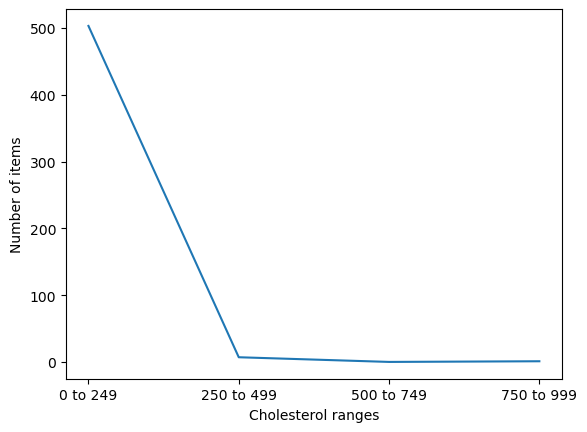

In [13]:
# show distribution of cholesterol range on a line graph


cholesterol_groups = pd.DataFrame({
    'cholesterol ranges': ['0 to 249', '250 to 499', '500 to 749', '750 to 999'],
    'number of items': [503, 7, 0, 1]
})

# Create a line graph
plt.plot(cholesterol_groups['cholesterol ranges'], cholesterol_groups['number of items'])

# Set the x-axis and y-axis labels
plt.xlabel('Cholesterol ranges')
plt.ylabel('Number of items')

# Show the plot
plt.show()

# Analysis
**we can see that majority of the items at fast food restaurants have cholesterol ranges that are below or within the daily recommended values of cholesterol intake (200)

## Sodium Analysis

In [15]:
# Find highest and lowest sodium values

# Find the minimum cholesterol value
min_sodium = fast_food_df['sodium'].min()

# Find the maximum cholesterol value
max_sodium = fast_food_df['sodium'].max()

print("The minimum sodium value is", min_sodium)
print("The maximum sodium value is", max_sodium)

The minimum sodium value is 15
The maximum sodium value is 6080


In [16]:
# Recommended Sodium intake is 2300

In [17]:
#copy dataframe for sodium analysis

fast_food_sodium_df = fast_food_df.copy()

In [18]:
# Sodium Bins

# Bins to place values
bins = [0, 999, 1999, 2999, 3999, 4999, 5999, 6999]

# Labels for each bin
group_labels = ["0 to 999", "1000 to 1999", "2000 to 2999",  
                "3000 to 3999", "4000 to 4999", "5000 to 5999", 
               "6000 to 6999"]

# executing the data frame into bins
pd.cut(fast_food_sodium_df["sodium"], bins, labels=group_labels)

fast_food_sodium_df["sodium ranges"] = pd.cut(fast_food_sodium_df["sodium"], bins, labels=group_labels, include_lowest=True)
fast_food_sodium_df.head()

,restaurant,item,calories,cal_fat,total_fat,sat_fat,trans_fat,cholesterol,sodium,total_carb,fiber,sugar,protein,salad,sodium ranges
0,Mcdonalds,Artisan Grilled Chicken Sandwich,380,60,7,2.0,0.0,95,1110,44,3.0,11,37.0,False,1000 to 1999
1,Mcdonalds,Single Bacon Smokehouse Burger,840,410,45,17.0,1.5,130,1580,62,2.0,18,46.0,False,1000 to 1999
2,Mcdonalds,Double Bacon Smokehouse Burger,1130,600,67,27.0,3.0,220,1920,63,3.0,18,70.0,False,1000 to 1999
3,Mcdonalds,Grilled Bacon Smokehouse Chicken Sandwich,750,280,31,10.0,0.5,155,1940,62,2.0,18,55.0,False,1000 to 1999
4,Mcdonalds,Crispy Bacon Smokehouse Chicken Sandwich,920,410,45,12.0,0.5,120,1980,81,4.0,18,46.0,False,1000 to 1999


In [19]:
# How many food items fall into each created bins - 

# Groupby using cholesterol ranges
sodium_groups = fast_food_sodium_df.groupby('sodium ranges')

# Print the data
print(sodium_groups["sodium ranges"].count())

sodium ranges
0 to 999        203
1000 to 1999    251
2000 to 2999     45
3000 to 3999      9
4000 to 4999      2
5000 to 5999      0
6000 to 6999      1
Name: sodium ranges, dtype: int64


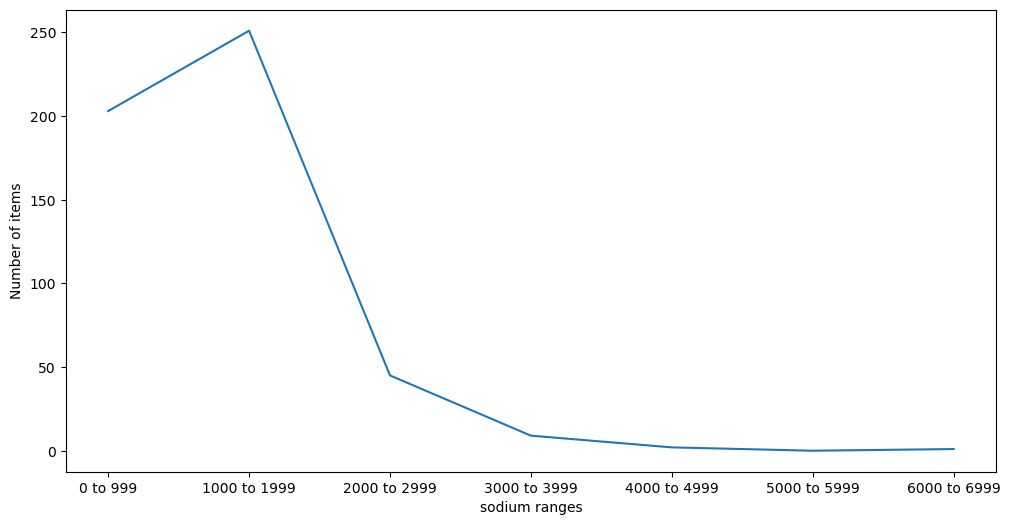

In [50]:
# show distribution of sodium range on a line graph


sodium_groups = pd.DataFrame({
    'sodium ranges': ["0 to 999", "1000 to 1999", "2000 to 2999",  
                "3000 to 3999", "4000 to 4999", "5000 to 5999", 
               "6000 to 6999"],
    'number of items': [203, 251, 45, 9, 2, 0, 1]
})

# Set the width of the plot
plt.figure(figsize=(12, 6))

# Create a line graph
plt.plot(sodium_groups['sodium ranges'], sodium_groups['number of items'])

# Set the x-axis and y-axis labels
plt.xlabel('sodium ranges')
plt.ylabel('Number of items')



# Show the plot
plt.show()

## Analysis 
**we can see that majority of the items at fast food restaurants have sodium ranges that are below or within the daily recommended values of sodium intake (2300)